In [5]:
import numpy as np
import pandas as pd
import qiime2 as q2
from biom import Table
from scipy import stats
from scipy.stats import ttest_ind, spearmanr

# plotting
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


## Growth curves


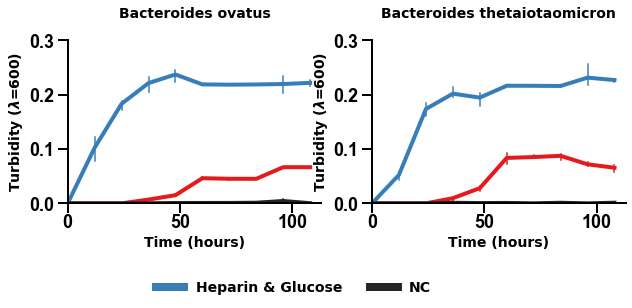

In [6]:

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.major.pad'] = '.1'

oddf = pd.read_csv('../data/cultivation-experiments/growth-curves.csv',
                   index_col=0)

fig, axn = plt.subplots(1, 2, figsize=(10, 3),
                        sharey=False, sharex=False)

pal_ = {'Heparin':'#e41a1c',
        'Heparin & Glucose':'#377eb8',
        'NC':'#252525'}


for (k_, df_), ax in zip(oddf.groupby('strainname'), axn.flatten()):

    sns.lineplot(x='time',y='OD',err_style='bars',
                 hue='condition', data=df_,
                 ax=ax, lw=4, ci=95, palette=pal_)
    ax.set_title('\n'.join(k_.replace('_','').split(' ')[:]),
                 fontsize=12, y=.85)
    ax.set_title(' '.join(k_.replace('_','').split(' ')[:]),
                 fontsize=14, y=1.1, weight='bold')
    ax.set_ylabel('Turbidity ($\\lambda$=600)',
                  fontsize=14,
                  color='black')
    ax.set_xlabel('Time (hours)',
                  fontsize=14,
                  color='black')
    ax.legend_.remove()
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    df_.time.min()

    ax.spines['bottom'].set_bounds(df_.time.min(),
                                   df_.time.max()+5)
    ax.set_xlim(df_.time.min()-5,
                df_.time.max()+5)    

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
    ax.set_xlim(0,)
    ax.set_ylim(0,.3)

    

# generate legend from last iterations     
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[1:], labels[1:], loc=2, 
                         bbox_to_anchor=(-.9, -.4),
                         prop={'size':14},
                         fancybox=False, framealpha=.0,
                         ncol=5, markerscale=.5)
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(8.0)


plt.savefig('../results/figures/Fig3A.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()

## Blyscan heparin assay



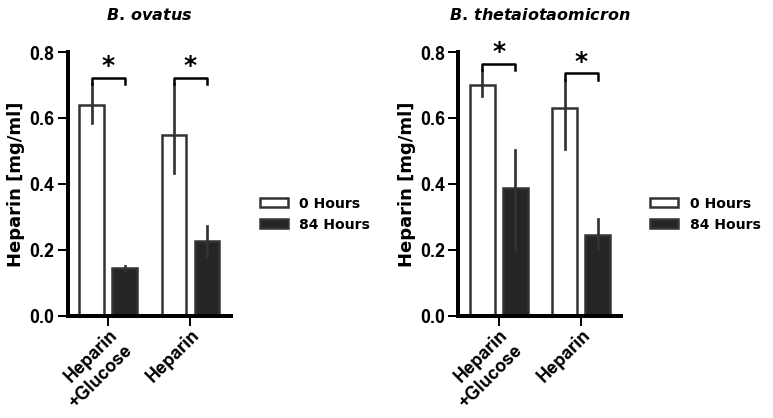

In [7]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import data
dyedf = pd.read_csv('../data/cultivation-experiments/blyscan.csv', index_col=0)

fig, axn = plt.subplots(1, 2, figsize=(11, 6),
                        sharey=False,
                        sharex=False)

order_ = ['Heparin\n+Glucose','Heparin']
pal_ = {'0 Hours':'#ffffff','84 Hours':'#252525'}

axn = axn.flatten()
for (k_, df_), (i_, ax) in zip(dyedf.groupby('strain'),
                               enumerate(axn)):
    
    sns.barplot(y='conc (mg/ml)',
                x='condition',
                hue='time',
                palette=pal_,
                alpha=1,
                order=order_,
                linewidth=2.5,
                errcolor=".2",
                edgecolor=".2",
                data=df_, ax=ax,
                color='#636363')
    
    change_width(ax, .3)

    ax.set_ylim(0,0.8)
    
    vars_ = k_.replace('_','').split(' ')
    vars_ = '$' + vars_[0][0] + '.\,' + vars_[1] + '$'
    
    ax.set_title(vars_,
                 fontsize=16,
                 weight='bold', y=1.1)

    ax.set_ylabel('Heparin [mg/ml]',
                  weight='bold',
                  fontsize=18,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_color("black")
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
        
    
    for ord_, (x1,x2) in zip(order_, [[-0.2,.2],[0.8,1.2]]):
        
        df_t_sub = df_[df_.condition == ord_]
    
        ## add stats
        t_, p_ = stats.ttest_ind(df_t_sub[df_t_sub.time == '0 Hours']['conc (mg/ml)'].values,
                                 df_t_sub[df_t_sub.time == '84 Hours']['conc (mg/ml)'].values)

        # n.s.
        if p_ >= 0.05:
            p_ = 'n.s.'
        #*P < 0.05;
        elif p_ < 0.05 and p_ > 0.0001:
            p_ = '*'
        #**P < 0.001;
        elif p_ < 0.0001 and p_ > 0.00001:
            p_ = '**'
        #***P < 0.0001
        elif p_ < 0.00001:
            p_ = '***'
        y, h, col = df_t_sub['conc (mg/ml)'].max() + 0, .02, 'k'
        ax.plot([x1, x1, x2, x2],
                [y, y+h, y+h, y],
                lw=2.5, c=col)
        ax.text((x1+x2)*.5, y+h, p_,
                ha='center', va='bottom',
                color=col, fontsize=25)
        
    # generate legend from last iterations     
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles[:], labels[:], loc=2, 
                             bbox_to_anchor=(1.1, .5),
                             prop={'size':14},
                             fancybox=False, framealpha=.0,
                             ncol=1, markerscale=.5)

# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)
plt.tight_layout()

plt.savefig('../results/figures/Fig3B.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()


### Lung cell staining


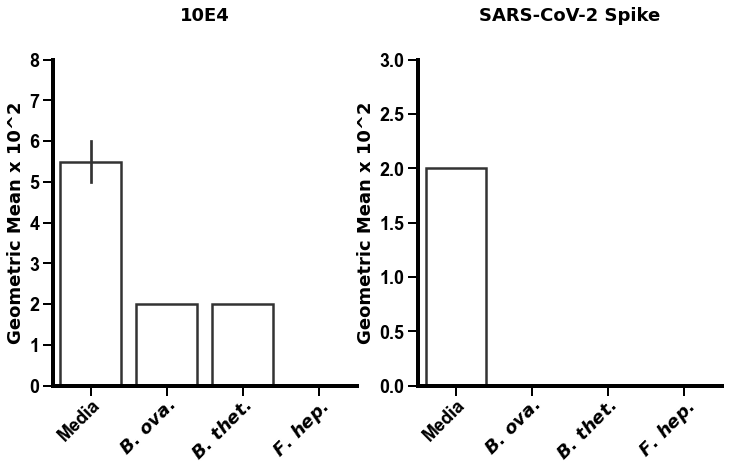

In [8]:
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# import data
HSstain = pd.read_csv('../data/cultivation-experiments/HS-cell-treat.csv', index_col=0)
SARSstain = pd.read_csv('../data/cultivation-experiments/Sbind-cell-treat.csv', index_col=0)


fig, axn = plt.subplots(1, 2, figsize=(12, 6),
                        sharey=False,
                        sharex=False)

order_ = ['Media','$B.\\,ova.$','$B.\\,thet.$','$F.\\,hep.$',]

axn = axn.flatten()
for (k_, df_), (ymin, ymax), (i_, ax) in zip([('10E4',HSstain),
                                              ('SARS-CoV-2 Spike',SARSstain)],
                                           [(0,8),(0,3)],
                                           enumerate(axn)):

    df_[df_.columns[0]] = df_[df_.columns[0]] // 10**2
    sns.barplot(y=df_.columns[0],
                x='g2',
                alpha=1,
                order=order_,
                linewidth=2.5,
                facecolor=(1, 1, 1, 0),
                errcolor=".2",
                edgecolor=".2",
                data=df_, ax=ax,
                color='#636363')

    ax.set_ylim(ymin, ymax)

    ax.set_title(k_,
                 fontsize=18,
                 weight='bold', y=1.1)

    ax.set_ylabel('Geometric Mean x 10^2',
                  weight='bold',
                  fontsize=18,
                  color='black') 
    ax.set_xlabel('')

    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for axis in ['bottom','left']:
          ax.spines[axis].set_linewidth(4)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('black')
    ax.tick_params(axis='y', colors='black', width=2, length=10)
    ax.tick_params(axis='x', colors='black', width=2, length=10)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right',
                       rotation_mode="anchor")
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_ha("right")
        tick.set_color("black")
        tick.set_fontsize(18)
    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_color("black")
        tick.set_fontsize(18)
    
# set the backrounf to be transparent
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.0)

plt.savefig('../results/figures/Fig3C&D.pdf',dpi=1000, 
            bbox_inches='tight',
            facecolor=fig.get_facecolor(), 
            edgecolor='none')

plt.show()
